## Import data

In [1]:
import sys
sys.path.append('..')
from pipeline import ICAPipe

`path_to_eeg` - can be any type of eeg file that MNE's [read_raw](https://mne.tools/stable/generated/mne.io.read_raw.html) function supports.

`output_directory` - a directory you want the results to be saved in

`n_components` - number of principal components (from the pre-whitening PCA step) that are passed to the ICA algorithm during fitting. More info [here](https://mne.tools/stable/generated/mne.preprocessing.ICA.html).

In [2]:
ica_pipe = ICAPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif",
    output_directory=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    method='fastica', 
    fit_params=None,
    n_components=15)

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif...
    Reading extended channel information
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw-1.fif...
    Reading extended channel information
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.
Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...


Run the ICA decomposition on 1.0Hz high-pass filtered data

In [3]:
ica_pipe.fit()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)

Now using CUDA device 0
Enabling CUDA with 10.97 GB available memory
Using CUDA for FFT FIR filtering
Fitting ICA to data using 257 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 87.1s.


Plot independent components from raw data

In [4]:
ica_pipe.plot_sources()

Creating RawArray with float64 data, n_channels=16, n_times=2229773
    Range : 0 ... 2229772 =      0.000 ...  8919.088 secs
Ready.
Using qt as 2D backend.


Plot components on interpolated sensor topography.

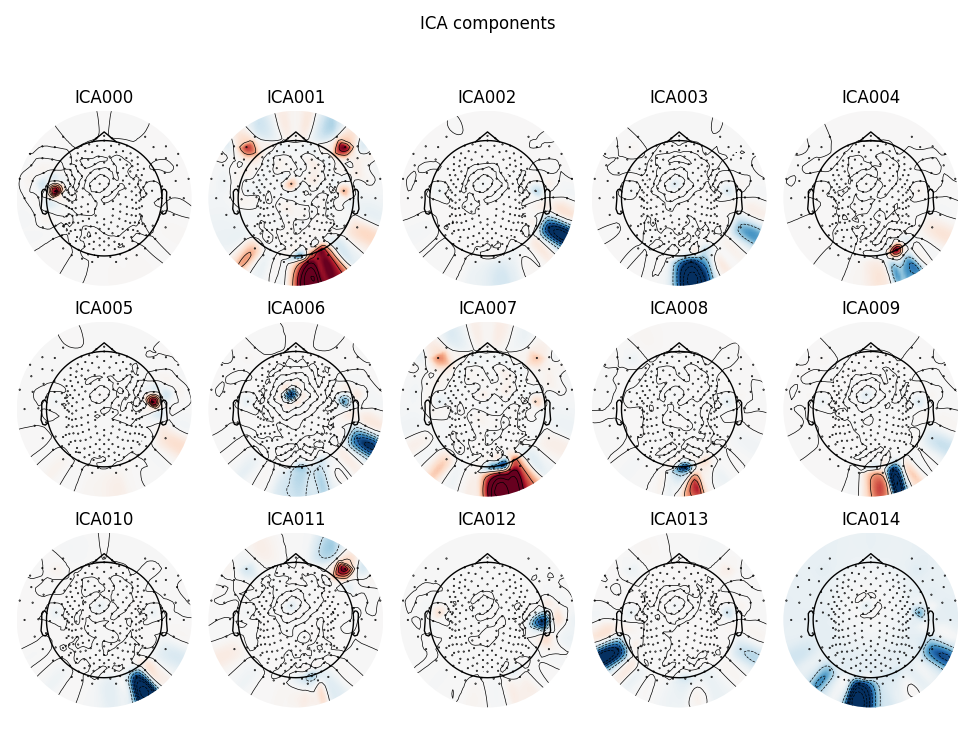

In [9]:
%matplotlib qt
ica_pipe.plot_components()

In [10]:
ica_pipe.mne_raw.load_data()

<Raw | cleaned_raw.fif, 264 x 2229773 (8919.1 s), ~4.39 GB, data loaded>

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
4064 matching events found
No baseline correction applied
0 projection items activated


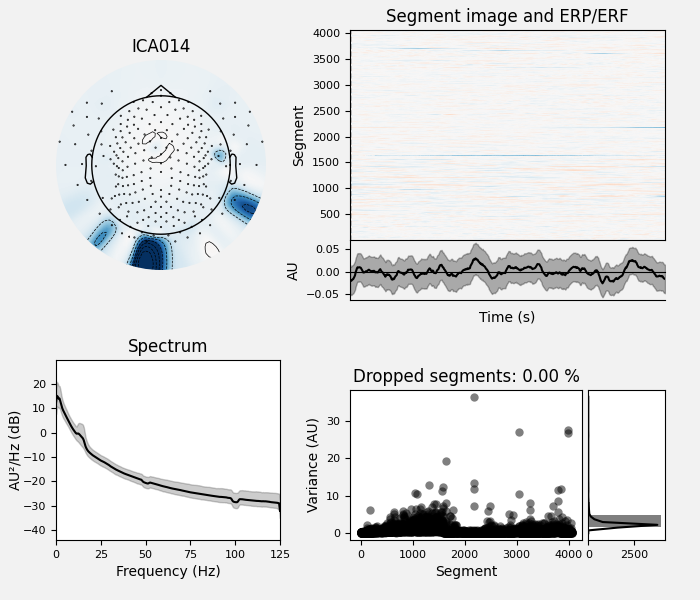

In [11]:
ica_pipe.plot_properties(picks=[14])

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 257 PCA components


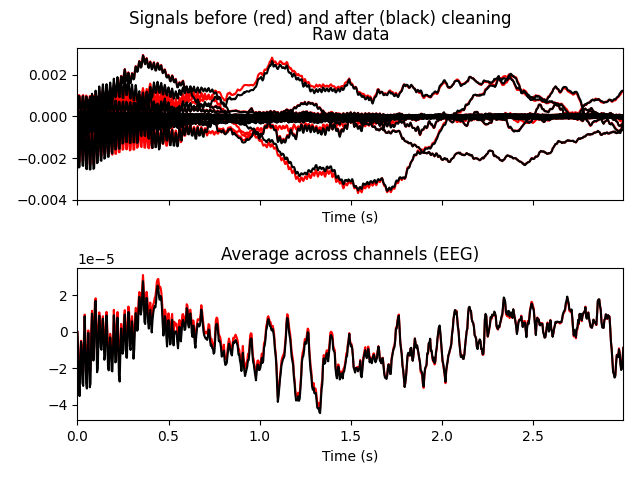

In [12]:
ica_pipe.plot_overlay(exclude=[7], picks='eeg')

In [13]:
ica_pipe.apply(exclude=[7])

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 257 PCA components


In [14]:
ica_pipe._save_raw('after_ica_raw.fif')

Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_ica_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_ica_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_ica_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_ica_raw.fif
[done]
